# CMSC 320 Final Project: Avocados!
Jacob Bartolomei & Russell Schwartz
5/13/20

## Introduction
The data set used here concerns the production and sale of avocados in the contintental United States. While not the most earth-shatteringly important topic, the trends present in this data exhibit numerous important economic principles. Moreover, the analysis techniques used to obtain these trends are applicable to many other datasets.

Import the necessary modules for the program to be run.
The library pandas allows for creation and managment of dataframe. 

In [1]:
import pandas as pd
from plotnine import *
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Data Curation
First download the csv file from the location found and place it
into the same directory as the program to be run. In this case,
avocado.csv was downloaded from
https://www.kaggle.com/neuromusic/avocado-prices. Then you will
Use the function read_csv from pandas with the path to the csv file as
the input. This creates a data frame. The head() function with return
the first 5 entities and you can use print on that to show them. 
Alternatively, you can use beautiful soup to scrape data off websites
if the csv file is not availble. 

In [2]:
df = pd.read_csv('./avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## Data Cleaning
Now that you have you data from the csv file in a data frame,
you can begin data cleaning.
Rename total volume for future use and drop the past version.
The drop function removes the columns that have the label "year" in
this case. Each entity already had a data attribute that included
year so it was a redundancy. Also dropped the columns pertaining to
plu because they will not be used. Also, drop the index column because it
is not needed.

Our primary relevant attributes are as follows
- Data: date the data was recorded
- AveragePrice: the mean price in USD per unit
- TotalVolume: the total number of units sold for that entry

In [3]:
df['TotalVolume'] = df['Total Volume']
df = df.drop(columns=['year', '4046', '4225', '4770', 'Unnamed: 0', 
                      'Total Volume'])
df

,Date,AveragePrice,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,TotalVolume
0,2015-12-27,1.33,8696.87,8603.62,93.25,0.0,conventional,Albany,64236.62
1,2015-12-20,1.35,9505.56,9408.07,97.49,0.0,conventional,Albany,54876.98
2,2015-12-13,0.93,8145.35,8042.21,103.14,0.0,conventional,Albany,118220.22
3,2015-12-06,1.08,5811.16,5677.40,133.76,0.0,conventional,Albany,78992.15
4,2015-11-29,1.28,6183.95,5986.26,197.69,0.0,conventional,Albany,51039.60
...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,17074.83
18245,2018-01-28,1.71,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,13888.04
18246,2018-01-21,1.87,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,13766.76
18247,2018-01-14,1.93,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,16205.22


Also check the data type of the attributes to make sure they are correct.
In this case, type and region are objects instead of strings and date is
an object instead of datetime. You can change them using
df.attribute.astype(type) and setting the column equal to that
date changed to datetime so that it can be used in future computation.

In [4]:
print(f'Before:\n{df.dtypes}')

df['type'] = df.type.astype('string')
df['region'] = df.region.astype('string')

# Given all the same time as the time of day is irrelavent.
df['date'] = pd.to_datetime(df['Date'] + ' ' + '00:00:00')
df = df.drop(columns='Date')
df['date'] = pd.to_datetime(df['date'])

print(f'\nAfter:\n{df.dtypes}')

df.head()

Before:
Date             object
AveragePrice    float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
region           object
TotalVolume     float64
dtype: object

After:
AveragePrice           float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    string
region                  string
TotalVolume            float64
date            datetime64[ns]
dtype: object


,AveragePrice,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,TotalVolume,date
0,1.33,8696.87,8603.62,93.25,0.0,conventional,Albany,64236.62,2015-12-27
1,1.35,9505.56,9408.07,97.49,0.0,conventional,Albany,54876.98,2015-12-20
2,0.93,8145.35,8042.21,103.14,0.0,conventional,Albany,118220.22,2015-12-13
3,1.08,5811.16,5677.40,133.76,0.0,conventional,Albany,78992.15,2015-12-06
4,1.28,6183.95,5986.26,197.69,0.0,conventional,Albany,51039.60,2015-11-29


Having deleted unnecessary columns and changed the data types of
attributes to be the approriate type, you look to see if the data
is complete or not. In our case, the data has no null or N/A
attributes for entities so nothing needs to be done with this.

In [5]:
df.isnull().sum()

AveragePrice    0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
region          0
TotalVolume     0
date            0
dtype: int64

## Exploratory Analysis: Visualization and Linear Regression
A good first step in data analysis is visualization. Plot the Average Price of avocados against the total volume of their
sales to see a relationship using a scatter plot. Include line of best fit.

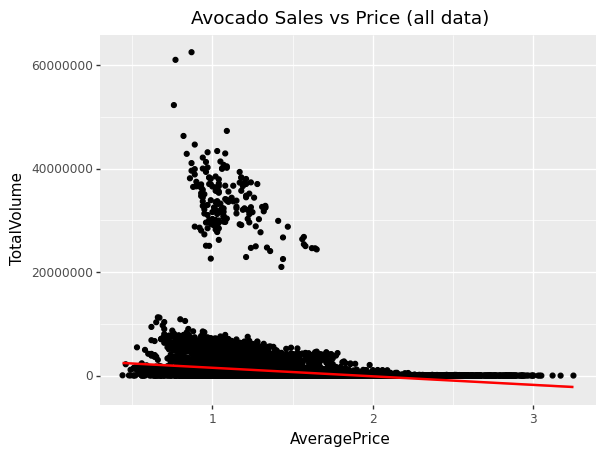

<ggplot: (-2117856941)>

In [6]:
ggplot(df, aes(x='AveragePrice', y='TotalVolume')) +\
    geom_point() +\
    geom_smooth(method='lm', color='r') +\
    ggtitle('Avocado Sales vs Price (all data)')

Check if the relation between total volume and average price is significant. More information on this sort of hypothesis test can be found [here](https://www.statsmodels.org/stable/index.html).

In [7]:
model = smf.ols(data=df, formula='TotalVolume ~ AveragePrice').fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            TotalVolume   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     704.1
Date:                Thu, 14 May 2020   Prob (F-statistic):          2.94e-152
Time:                        15:43:35   Log-Likelihood:            -3.0029e+05
No. Observations:               18249   AIC:                         6.006e+05
Df Residuals:                   18247   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     3.175e+06   9.11e+04     34.845      0.000       3e+06    3.35e+06
AveragePrice -1.653e+06   6.23e+04    -26.535      0.000   -1.78e+06   -1.53e+06
==============================================================================
Omnibus:                    26519.723   Durbin-Watson:                   0.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6815519.447
Skew:                           9.028   Prob(JB):                         0.00
Kurtosis:                      95.937   Cond. No.                         7.66
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Results indicate that the relation between total volume and average price
is significant because the P > |t| value is very small (rounds to 0). This means the relationship
between the two can be shown to be as average price increases,
total volume will decrease. Which makes sense because demand is highest
with lower prices.

Closer inspection of the scatter plot reveals that there are actually two clear groups of data points:
- The main series centered around ~15 million units
- A smaller group of outliers with volumes > 20 million units

We repeat our analysis from above on these two groups seperately. The `query` function provides a friendly SQL-like interface for getting subsets of our data that satisfy certain predicates. More info on `query` can be found [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html).

In [8]:
df_low = df.query('TotalVolume < 20000000')
df_low

,AveragePrice,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,TotalVolume,date
0,1.33,8696.87,8603.62,93.25,0.0,conventional,Albany,64236.62,2015-12-27
1,1.35,9505.56,9408.07,97.49,0.0,conventional,Albany,54876.98,2015-12-20
2,0.93,8145.35,8042.21,103.14,0.0,conventional,Albany,118220.22,2015-12-13
3,1.08,5811.16,5677.40,133.76,0.0,conventional,Albany,78992.15,2015-12-06
4,1.28,6183.95,5986.26,197.69,0.0,conventional,Albany,51039.60,2015-11-29
...,...,...,...,...,...,...,...,...,...
18244,1.63,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,17074.83,2018-02-04
18245,1.71,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,13888.04,2018-01-28
18246,1.87,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,13766.76,2018-01-21
18247,1.93,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,16205.22,2018-01-14


In [9]:
df_high = df.query('TotalVolume >= 20000000')
df_high

,AveragePrice,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,TotalVolume,date
2652,0.95,6288852.44,4850404.09,1252626.31,185822.04,conventional,TotalUS,27297983.67,2015-12-27
2653,0.98,5842743.55,4618389.66,1025048.77,199305.12,conventional,TotalUS,25083647.17,2015-12-20
2654,0.93,6364279.64,4964462.13,1371440.28,28377.23,conventional,TotalUS,28041335.38,2015-12-13
2655,0.89,6302262.96,5005077.36,1233956.21,63229.39,conventional,TotalUS,28800396.57,2015-12-06
2656,0.99,4789009.00,3901953.04,856560.34,30495.62,conventional,TotalUS,22617999.38,2015-11-29
...,...,...,...,...,...,...,...,...,...
9097,0.87,19373134.37,13384586.80,5719096.61,269450.96,conventional,TotalUS,62505646.52,2018-02-04
9098,1.09,12923981.99,9749412.19,3041125.42,133444.38,conventional,TotalUS,40171640.84,2018-01-28
9099,1.08,13862460.48,9866218.28,3789722.90,206519.30,conventional,TotalUS,42939821.55,2018-01-21
9100,1.20,12180020.74,8128241.88,3917569.95,134208.91,conventional,TotalUS,37299945.22,2018-01-14


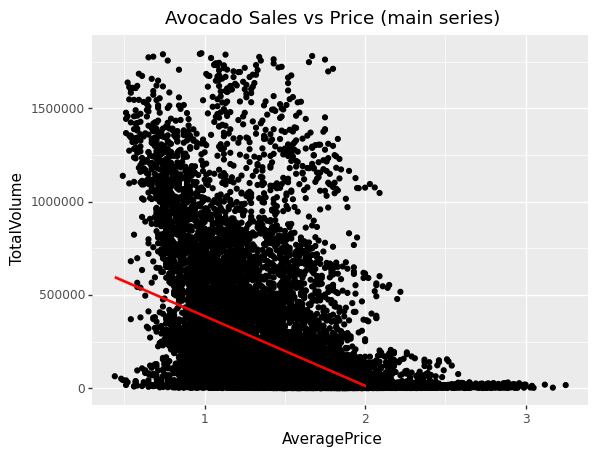

<ggplot: (-2115354776)>

In [10]:
import warnings; warnings.simplefilter('ignore')
ggplot(df_low, aes(x='AveragePrice', y='TotalVolume')) +\
    geom_point() +\
    geom_smooth(method='lm', color='r') +\
    ylim(0, 1800000) +\
    ggtitle('Avocado Sales vs Price (main series)')

In [11]:
model = smf.ols(data=df_low, formula='TotalVolume ~ AveragePrice').fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            TotalVolume   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     2394.
Date:                Thu, 14 May 2020   Prob (F-statistic):               0.00
Time:                        15:43:37   Log-Likelihood:            -2.7790e+05
No. Observations:               18080   AIC:                         5.558e+05
Df Residuals:                   18078   BIC:                         5.558e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2.001e+06    3.1e+04     64.568      0.000    1.94e+06    2.06e+06
AveragePrice -1.035e+06   2.11e+04    -48.926      0.000   -1.08e+06   -9.93e+05
==============================================================================
Omnibus:                    12630.256   Durbin-Watson:                   0.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           157548.033
Skew:                           3.350   Prob(JB):                         0.00
Kurtosis:                      15.816   Cond. No.                         7.68
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
model = smf.ols(data=df_high, formula='TotalVolume ~ AveragePrice').fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            TotalVolume   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     58.69
Date:                Thu, 14 May 2020   Prob (F-statistic):           1.42e-12
Time:                        15:43:37   Log-Likelihood:                -2854.8
No. Observations:                 169   AIC:                             5714.
Df Residuals:                     167   BIC:                             5720.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      5.33e+07   2.59e+06     20.611      0.000    4.82e+07    5.84e+07
AveragePrice -1.792e+07   2.34e+06     -7.661      0.000   -2.25e+07   -1.33e+07
==============================================================================
Omnibus:                       39.239   Durbin-Watson:                   0.647
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.956
Skew:                           0.933   Prob(JB):                     5.95e-24
Kurtosis:                       6.422   Cond. No.                         12.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As expected, both of these infernce tests reveal significant relationships.

Another potentially interesting relationship is TotalVolume vs Time. We again use a scatter plot to show this data, with some additional functionality from the `mizani` package for formatting dates.

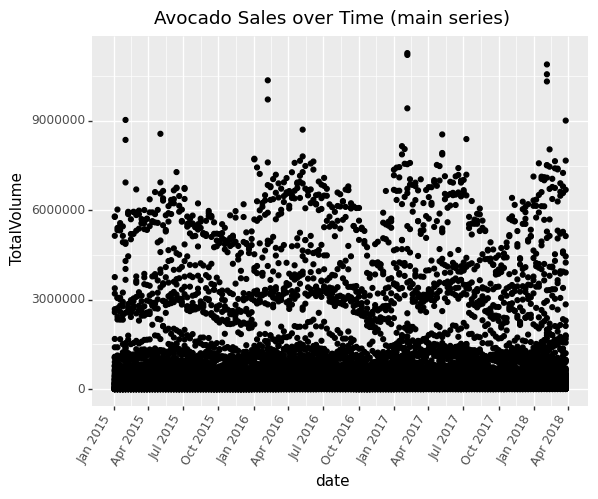

<ggplot: (32657071)>

In [13]:
from mizani.breaks import date_breaks
from mizani.formatters import date_format
ggplot(df_low, aes(x='date', y='TotalVolume')) +\
    geom_point() +\
    ggtitle('Avocado Sales over Time (main series)') +\
    scale_x_datetime(breaks=date_breaks('3 months'), labels=date_format('%b %Y')) +\
    theme(axis_text_x=element_text(rotation=60, hjust=1))

It is clear from this plot that there is a seasonal trend in Avocado quantity. Sales peak in the late Spring and drop off in the early Winter. This same pattern is even more obvious in the high-volume series.

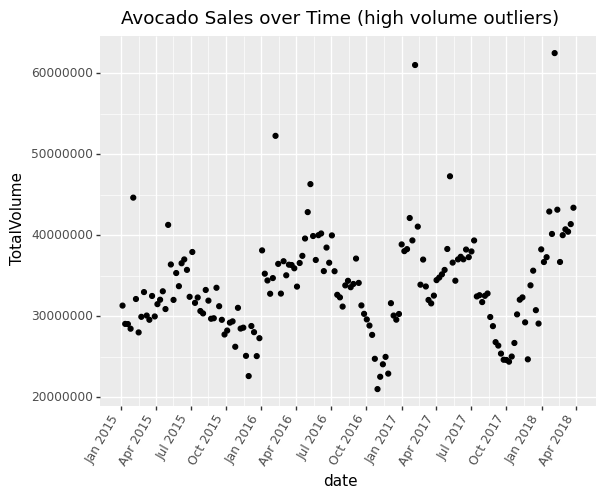

<ggplot: (32661342)>

In [14]:
ggplot(df_high, aes(x='date', y='TotalVolume')) +\
    geom_point() +\
    ggtitle('Avocado Sales over Time (high volume outliers)') +\
    scale_x_datetime(breaks=date_breaks('3 months'), labels=date_format('%b %Y')) +\
    theme(axis_text_x=element_text(rotation=60, hjust=1))

## Advanced Analysis: Machine Learning
To more completely explore the relationship between sales volume and time, we will attempt to train a model that can predict sales volume given a time of year (i.e. current season). We begin by adding a new column to our dataset that corresponds to how far into the year (how many days since Jan 1) every entry is. From here on out, we will be working with only the high-volume series since the trend is a bit clearer and the data size is more managabele (but the approach should generalize to the main series as well).

In [15]:
df_test = df_high
df_test['day'] = df_test['date'].map(lambda date: date.timetuple().tm_yday)
df_test

,AveragePrice,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,TotalVolume,date,day
2652,0.95,6288852.44,4850404.09,1252626.31,185822.04,conventional,TotalUS,27297983.67,2015-12-27,361
2653,0.98,5842743.55,4618389.66,1025048.77,199305.12,conventional,TotalUS,25083647.17,2015-12-20,354
2654,0.93,6364279.64,4964462.13,1371440.28,28377.23,conventional,TotalUS,28041335.38,2015-12-13,347
2655,0.89,6302262.96,5005077.36,1233956.21,63229.39,conventional,TotalUS,28800396.57,2015-12-06,340
2656,0.99,4789009.00,3901953.04,856560.34,30495.62,conventional,TotalUS,22617999.38,2015-11-29,333
...,...,...,...,...,...,...,...,...,...,...
9097,0.87,19373134.37,13384586.80,5719096.61,269450.96,conventional,TotalUS,62505646.52,2018-02-04,35
9098,1.09,12923981.99,9749412.19,3041125.42,133444.38,conventional,TotalUS,40171640.84,2018-01-28,28
9099,1.08,13862460.48,9866218.28,3789722.90,206519.30,conventional,TotalUS,42939821.55,2018-01-21,21
9100,1.20,12180020.74,8128241.88,3917569.95,134208.91,conventional,TotalUS,37299945.22,2018-01-14,14


Plotting these new values...

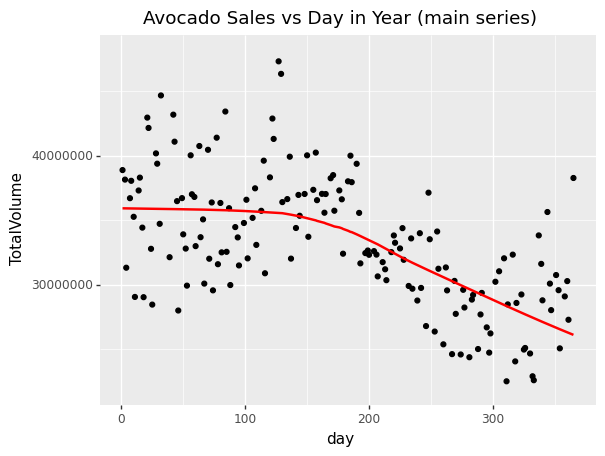

<ggplot: (-2113733947)>

In [16]:
ggplot(df_test, aes(x='day', y='TotalVolume')) +\
    geom_point() +\
    ggtitle('Avocado Sales vs Day in Year (main series)') +\
    geom_smooth(color='r') +\
    ylim(22000000, 48000000)

As expected, the curve reflects one period of the annual Avocado cycle described above. To make our predictions, we begin by transforming the data via a quadratic polynomial to bring it within the realm of linearity.

In [17]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# transform data via a quadratic polynomial
N = len(df_test)
X, y = df_test['day'].values.reshape((N, 1)), df_test['TotalVolume'].values.reshape((N, 1))
poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X)
y_ = poly.fit_transform(y)

We then run five-fold cross validation on the transformed data using an ordinary linear regression. (see https://en.wikipedia.org/wiki/Cross-validation_(statistics))

In [18]:
model = linear_model.LinearRegression()
scores = cross_validate(model, X_, y_, cv=3, scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)
scores['train_r2']

array([0.57275086, 0.54886817, 0.52816636])

As can be seen above, the `train_r2` values are decently high (all above 0.5), which indicates that out model faithfully represents the correlation beteen avocado sales and season.

Avenues for further analysis include
- standardizing volumes by region
- fitting a model to predict changes price over the past few years (maybe compared to a cost-of-living estimate)
- analyzing change in total revenue (price * volume) over time
- looking at other features of the date set like region